# **Traffic accidents severity classification**


Problem Statement:
The target feature is Accident_severity which is a multi-class variable. The task is to classify this variable based on the other 31 features. F1-score will be used as metric for evaluation.

Install and import libraries

In [1]:
!pip install dabl

In [2]:
#to use explainable AI
!pip install shap

In [3]:
!pip install imbalanced-learn

In [4]:
!pip install evidently

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.3/511.3 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.9/223.9 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.3/210.3 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 25.8 MB/s eta 0:00:00


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
import dabl
pd.pandas.set_option('display.max_columns',None)
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.svm import SVC

from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.metrics import f1_score,accuracy_score,classification_report
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import RepeatedKFold

import shap

In [7]:
# Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
file_path = '/content/RTA Dataset.csv'

In [9]:
df = pd.read_csv(file_path)

In [10]:
df.sample(5)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
4181,22:15:00,Friday,31-50,Male,NaN,Owner,5-10yr,Stationwagen,Owner,NaN,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,Crossing,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
10831,13:00:00,Saturday,18-30,Male,Junior high school,Owner,5-10yr,Public (12 seats),Owner,Unknown,NaN,Residential areas,NaN,Tangent road with flat terrain,NaN,Asphalt roads,Wet or damp,Daylight,Raining,Vehicle with vehicle collision,2,1,Moving Backward,na,na,na,na,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
11021,9:25:00,Friday,31-50,Male,Junior high school,Employee,2-5yr,Stationwagen,Owner,5-10yrs,NaN,Church areas,One way,Tangent road with flat terrain,NaN,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,3,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Other,Slight Injury
4336,12:56:00,Wednesday,Unknown,Female,Elementary school,Employee,1-2yr,Public (13?45 seats),Owner,NaN,No defect,Recreational areas,One way,Tangent road with mild grade and flat terrain,Crossing,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Moving Backward,Pedestrian,Male,31-50,2,Driver,Normal,Unknown or other,No distancing,Slight Injury
2898,8:17:00,Tuesday,18-30,Male,Elementary school,Employee,5-10yr,Stationwagen,Owner,Unknown,NaN,Other,Two-way (divided with broken lines road marking),Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,3,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury


In [11]:
original_df = df.copy(deep=True)

In [12]:
print('Rows: {} Columns: {}'.format(df.shape[0], df.shape[1]))

Rows: 12316 Columns: 32


**Exploratory Data Analysis**

In [13]:
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment  

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Number_of_vehicles_involved,12316.0,2.040679,0.688790,1.0,2.0,2.0,2.0,7.0
Number_of_casualties,12316.0,1.548149,1.007179,1.0,1.0,1.0,2.0,8.0


In [15]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]

print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 2
Discrete feature Count 2
Continuous feature Count 0
Categorical feature Count 30


In [17]:
df.nunique()

Time                           1074
Day_of_week                       7
Age_band_of_driver                5
Sex_of_driver                     3
Educational_level                 7
Vehicle_driver_relation           4
Driving_experience                7
Type_of_vehicle                  17
Owner_of_vehicle                  4
Service_year_of_vehicle           6
Defect_of_vehicle                 3
Area_accident_occured            14
Lanes_or_Medians                  7
Road_allignment                   9
Types_of_Junction                 8
Road_surface_type                 5
Road_surface_conditions           4
Light_conditions                  4
Weather_conditions                9
Type_of_collision                10
Number_of_vehicles_involved       6
Number_of_casualties              8
Vehicle_movement                 13
Casualty_class                    4
Sex_of_casualty                   3
Age_band_of_casualty              6
Casualty_severity                 4
Work_of_casuality           

#Data Visualization

In [27]:
# since the target variable is multiclass, therefore we will analyse
# and display this variable first

<ipython-input-34-e2348f01dfce>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=target_variable, ax=axes[0], palette='viridis')


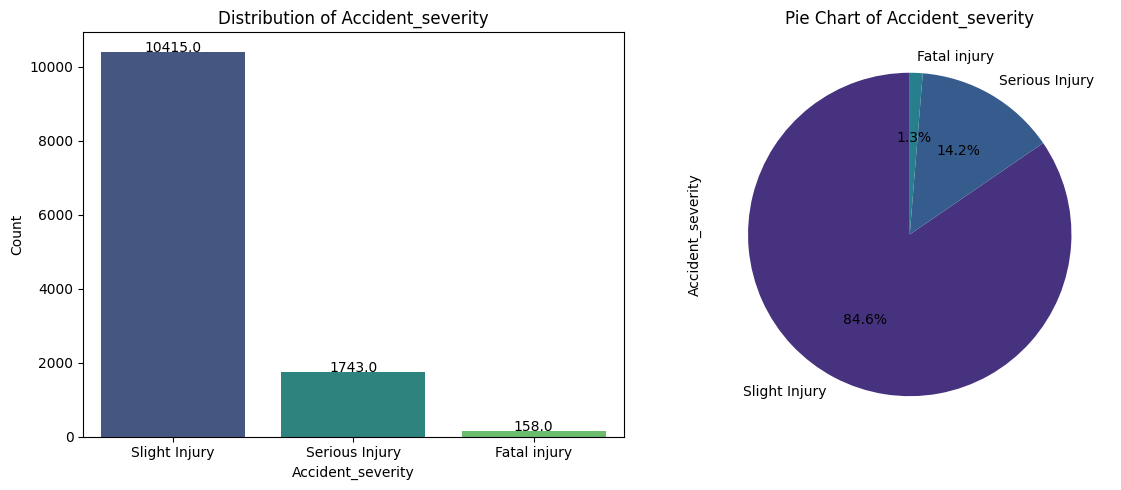

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Countplot for the target variable
sns.countplot(data=df, x=target_variable, ax=axes[0], palette='viridis')
axes[0].set_title(f'Distribution of {target_variable}')
axes[0].set_xlabel(target_variable)
axes[0].set_ylabel('Count')

# Pie chart for the target variable
df[target_variable].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=axes[1], colors=sns.color_palette('viridis'))
axes[1].set_title(f'Pie Chart of {target_variable}')

# Display the count labels on top of each bar in the countplot
for patch in axes[0].patches:
    height = patch.get_height()
    axes[0].text(patch.get_x() + patch.get_width() / 2, height + 0.3, f'{height}', ha='center')

# Display the plots
plt.tight_layout()
plt.show()


In [29]:
# target variable is highly imbalanced, so we will employ some technique
# later on to balance it before training our models

In [30]:
# before further analysis, we will convery time into hour of day
# and use this as a proper categorical variable
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')
df['Time'] = df['Time'].dt.hour

In [31]:
df_hour = df.copy(deep=True)

In [32]:
# Next we create graphs of different categorical variables wrt target variable

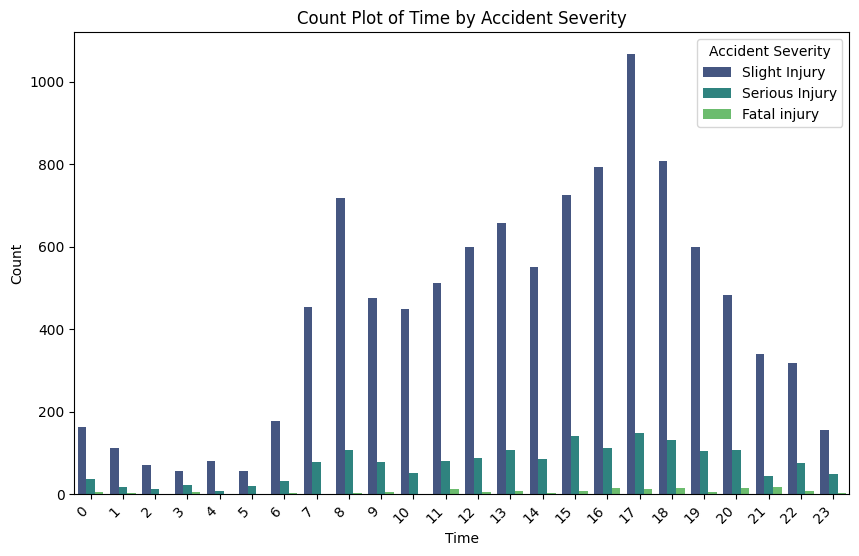

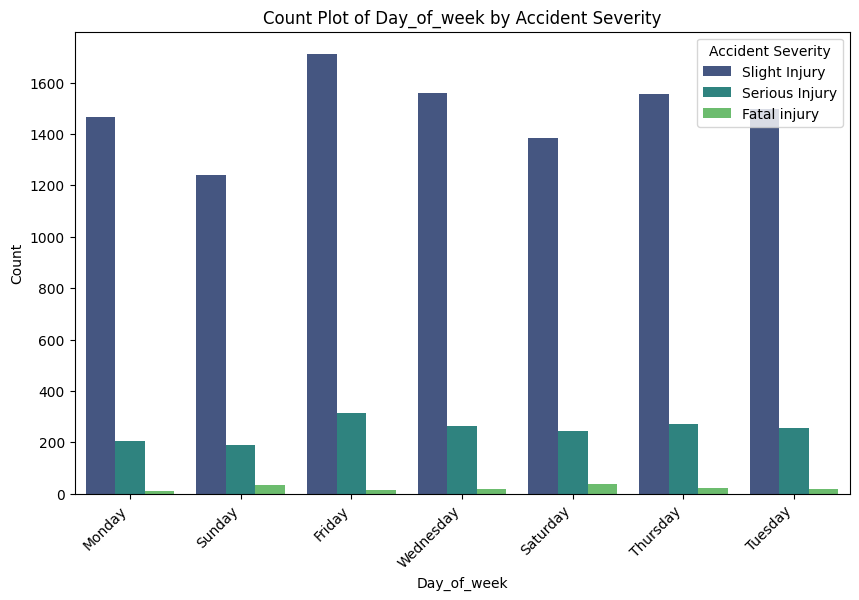

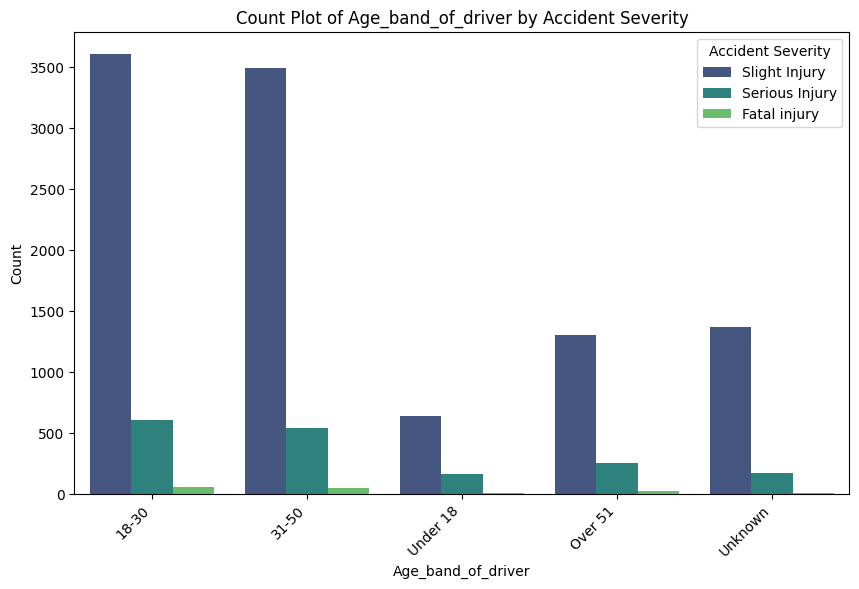

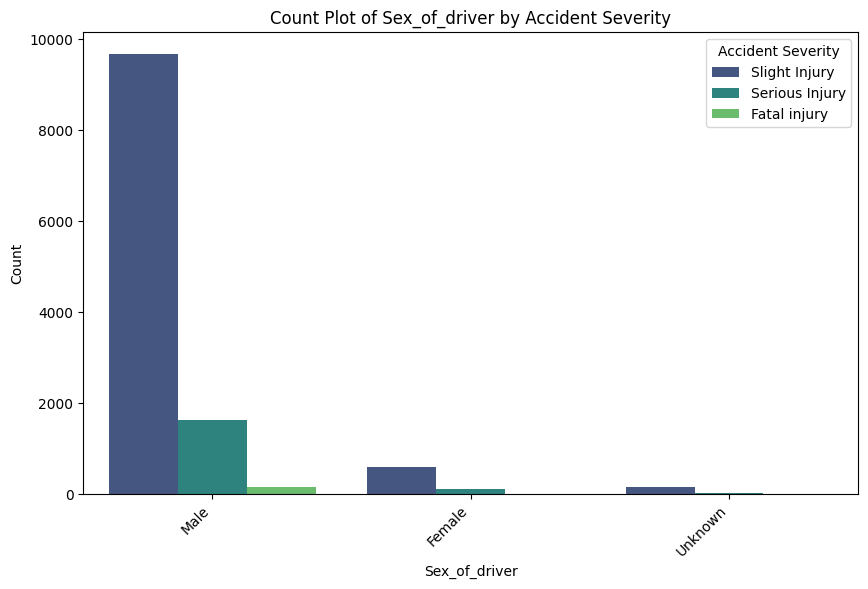

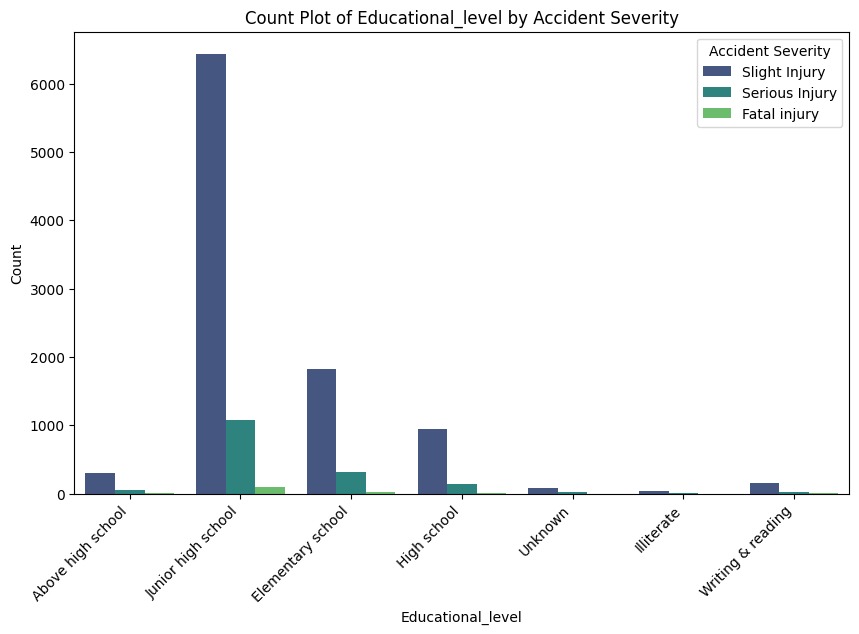

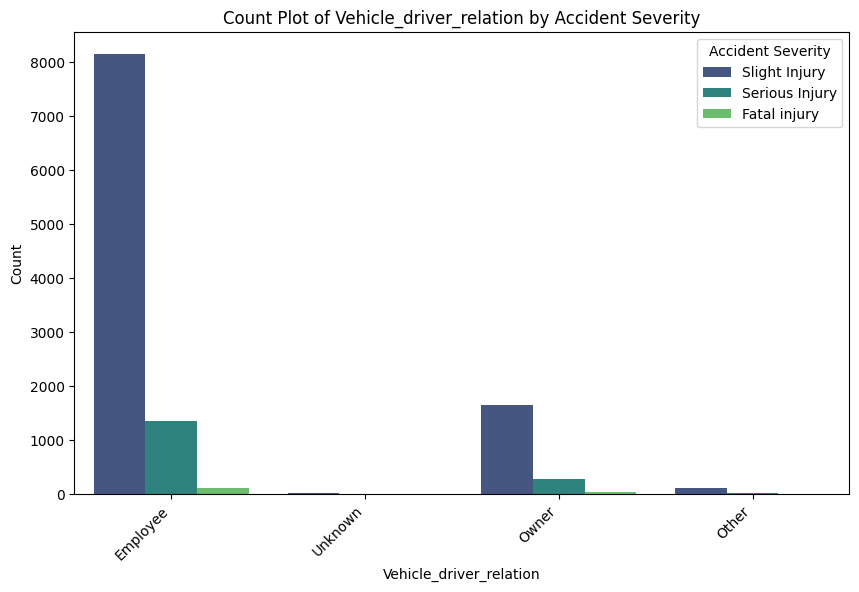

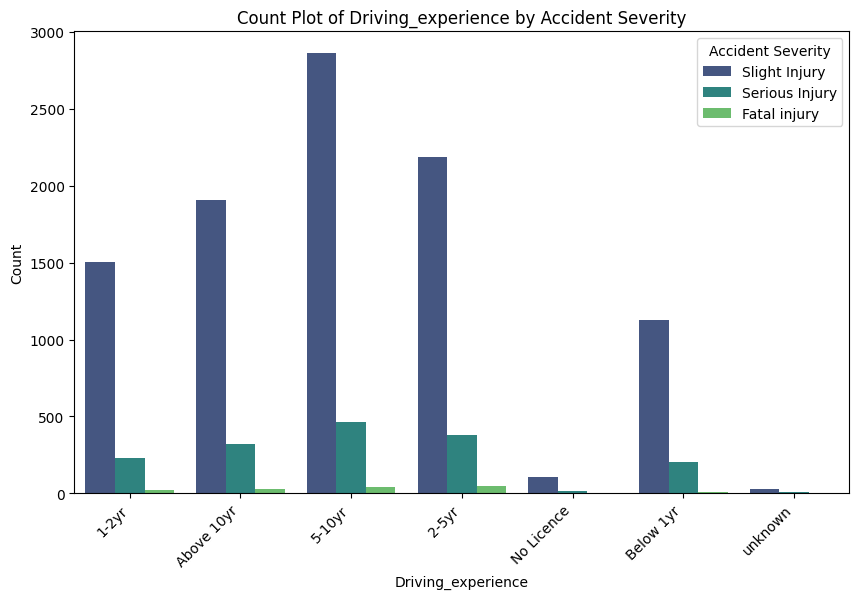

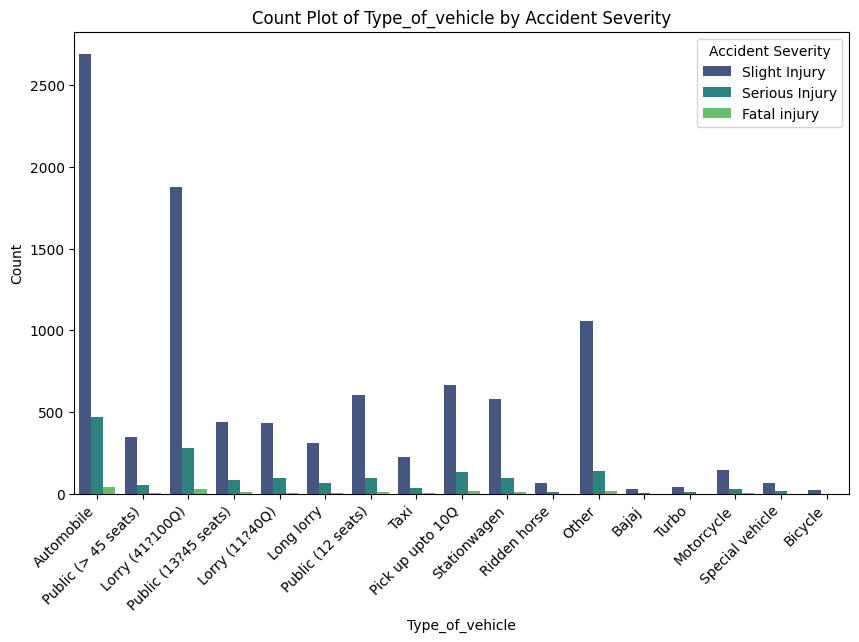

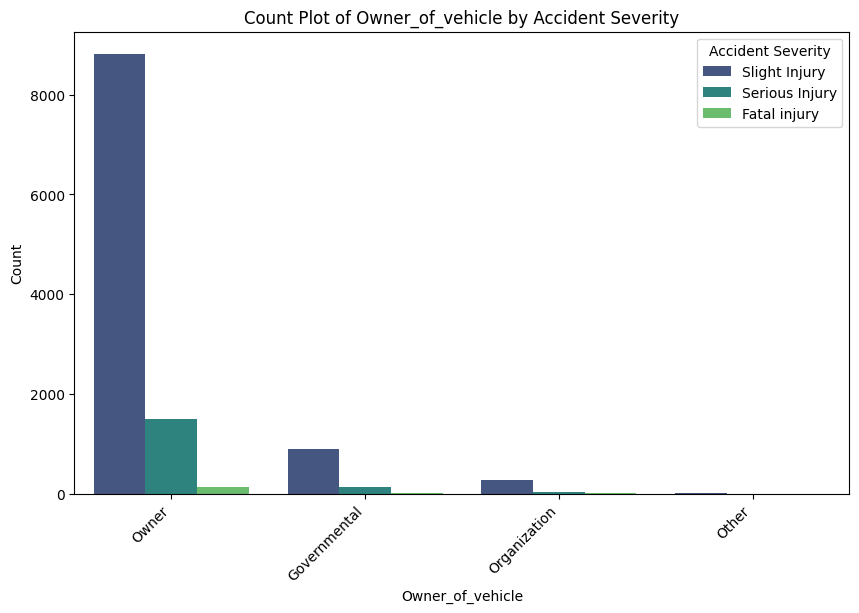

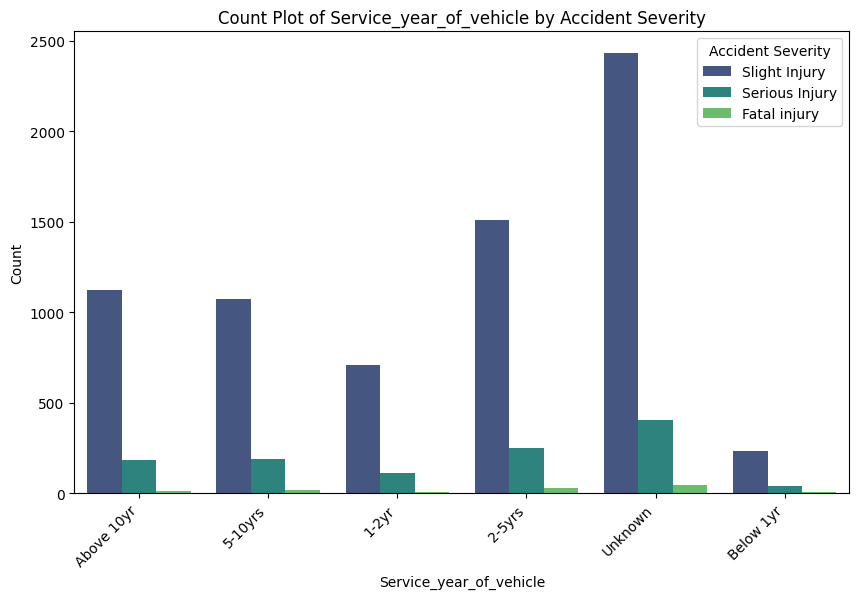

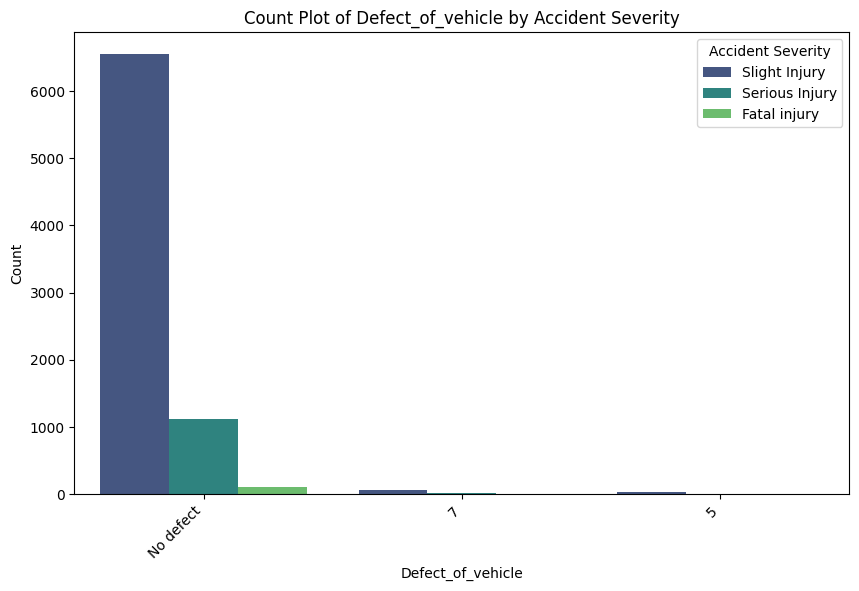

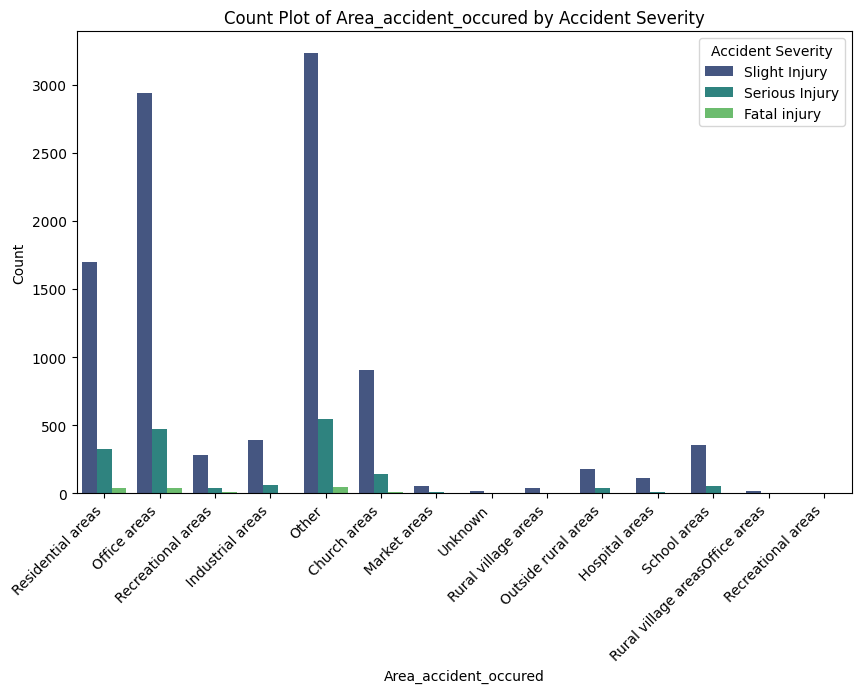

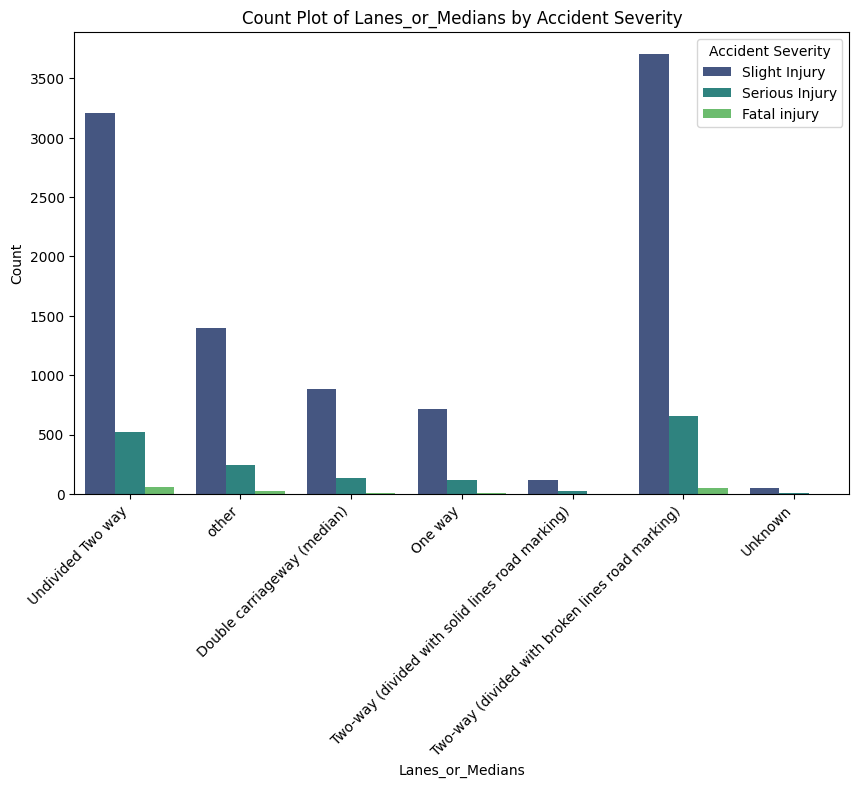

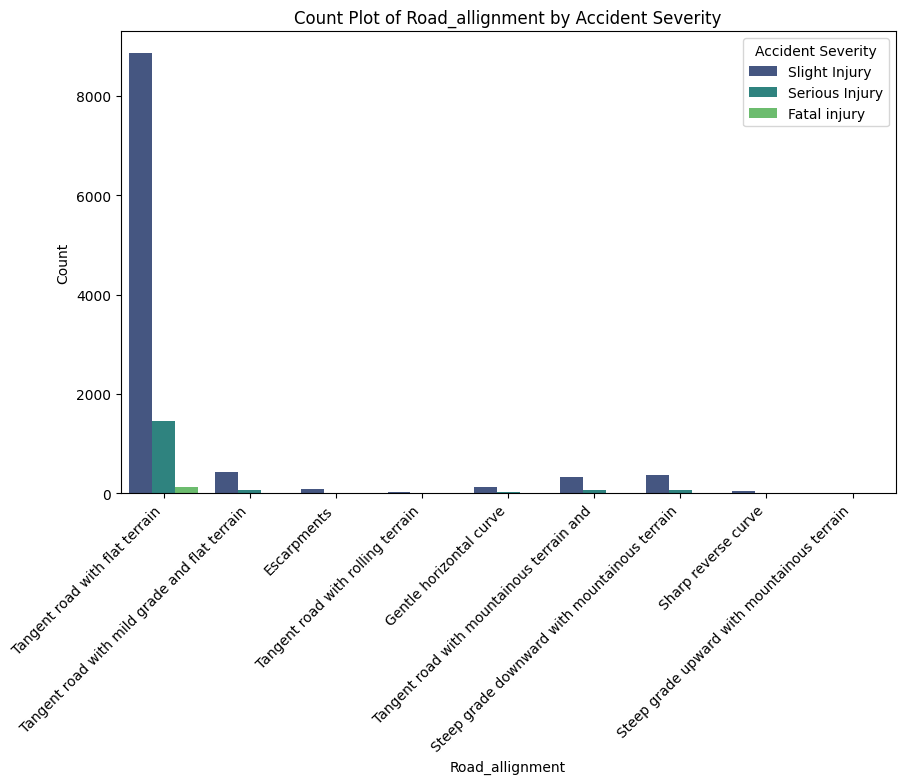

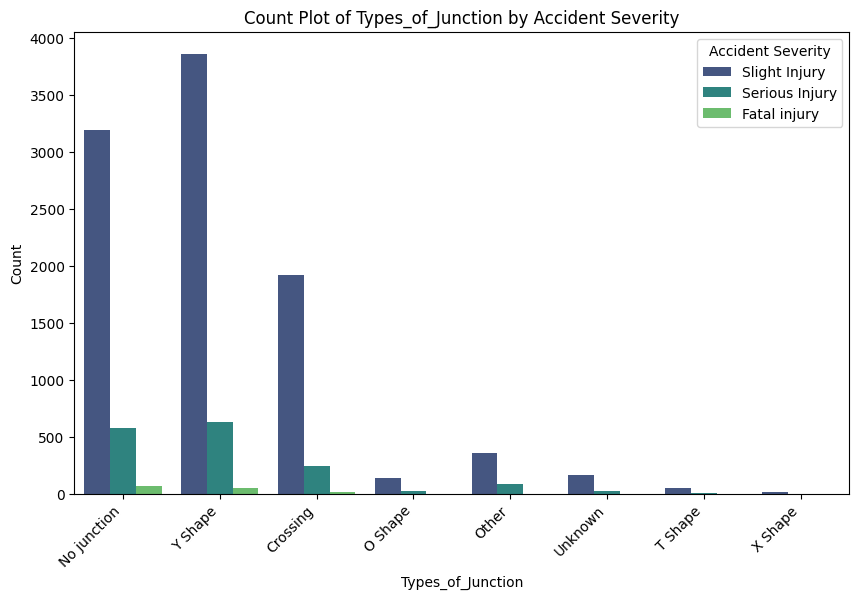

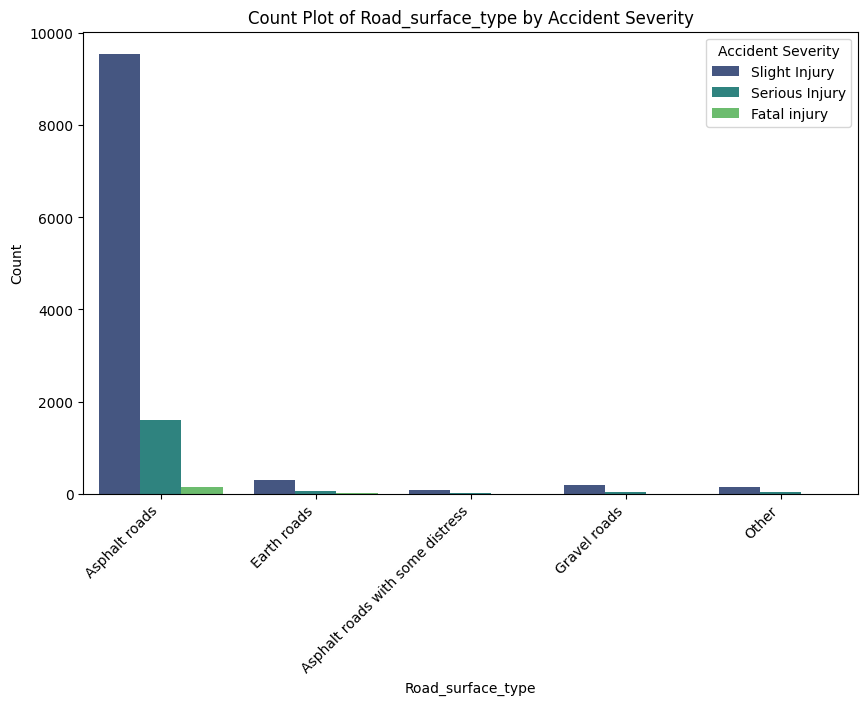

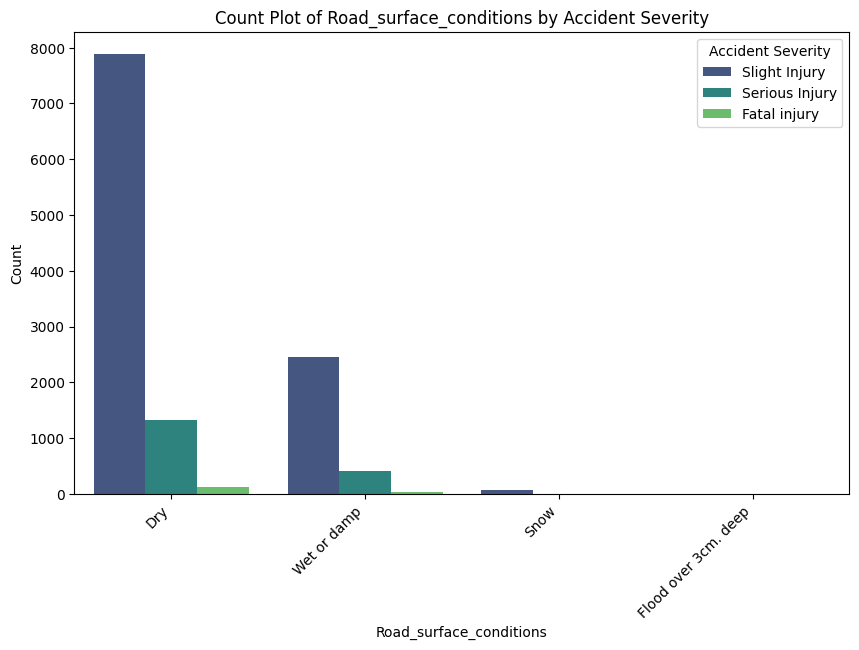

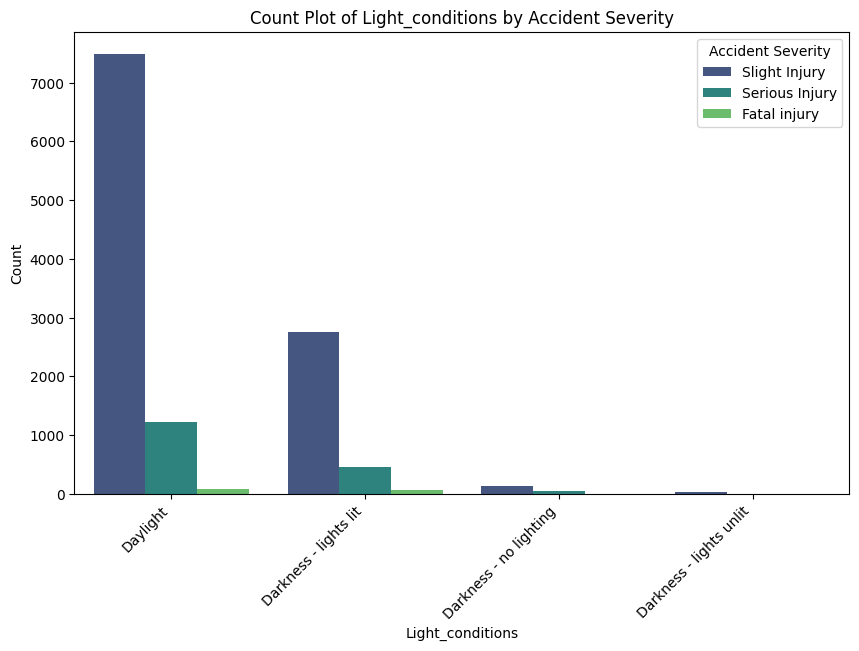

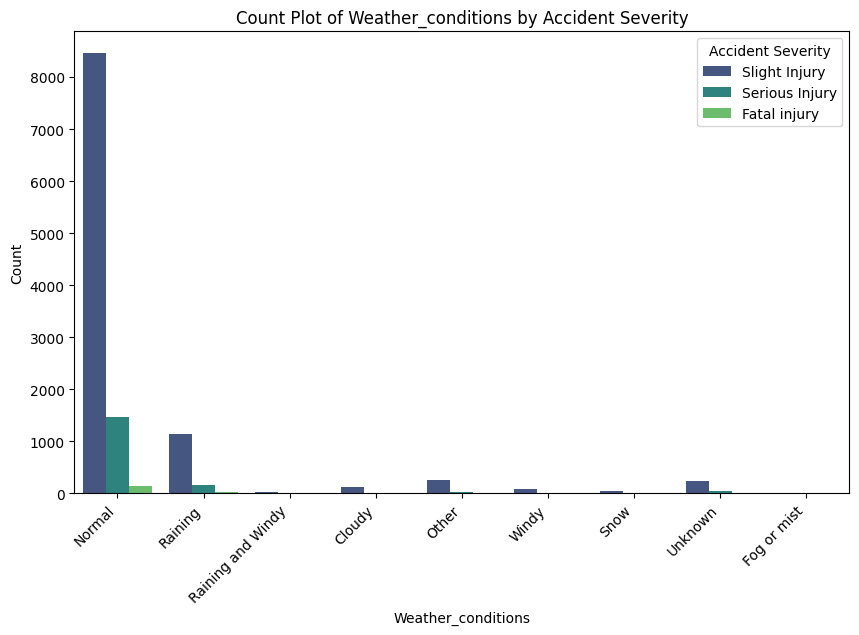

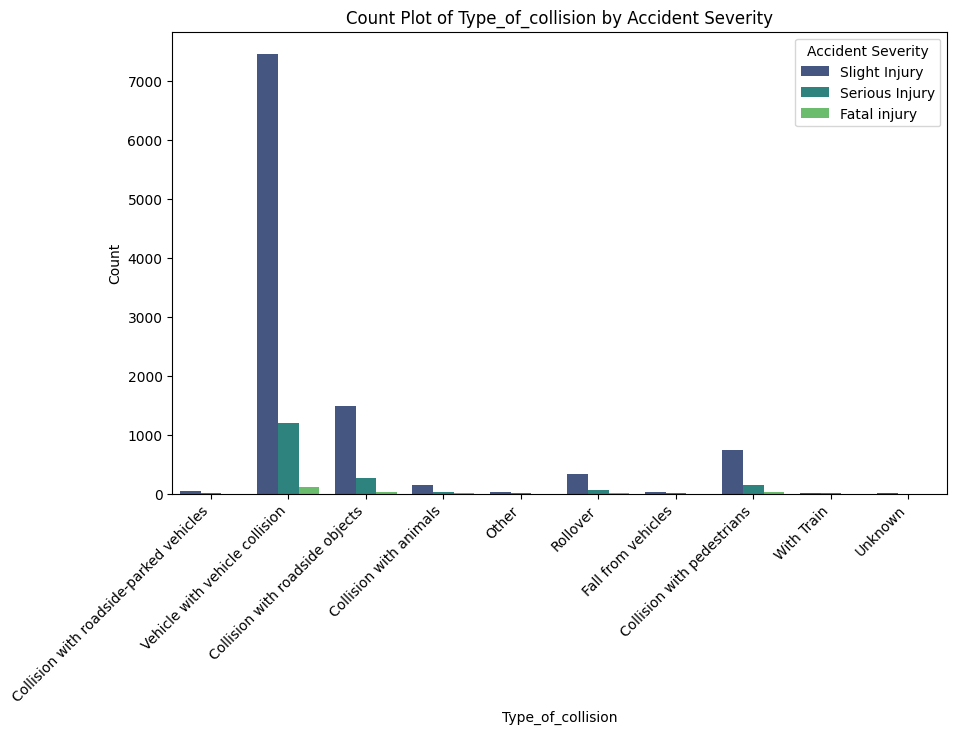

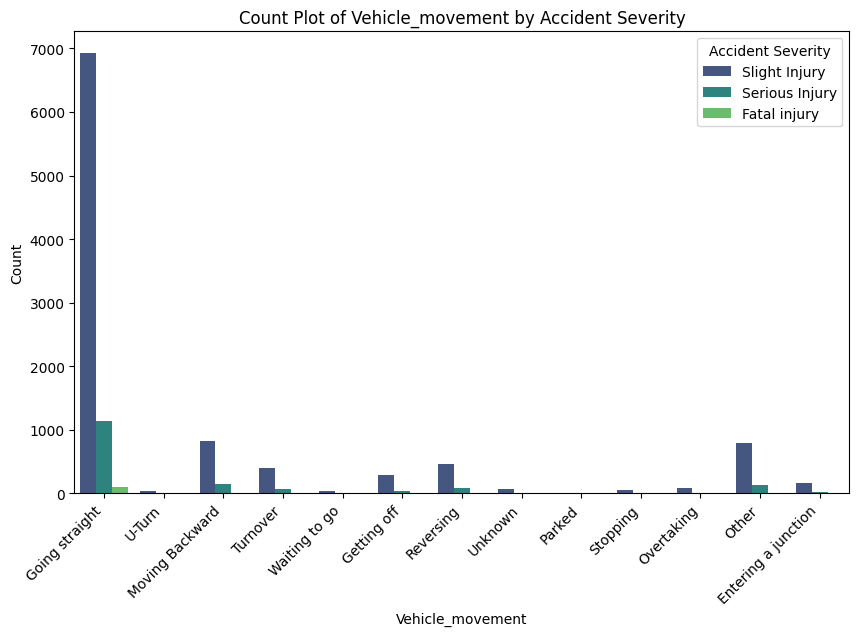

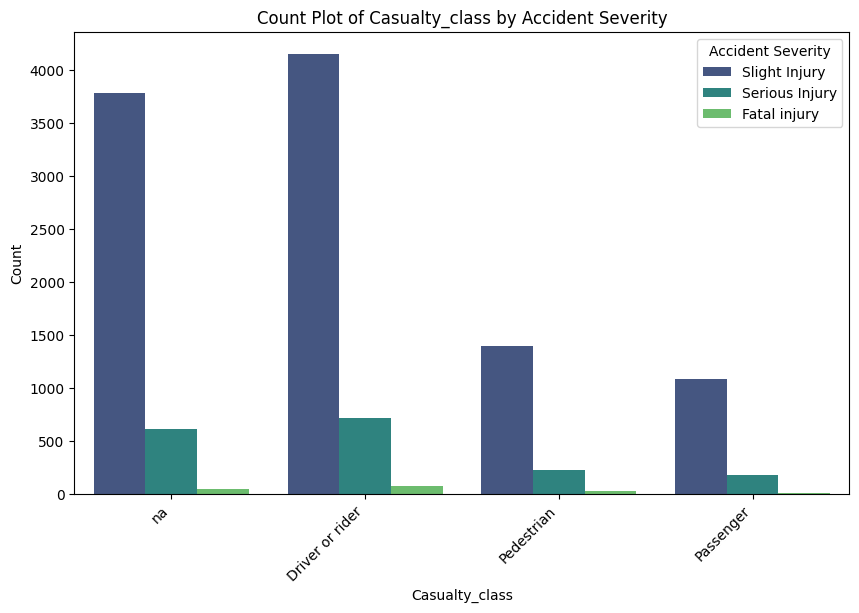

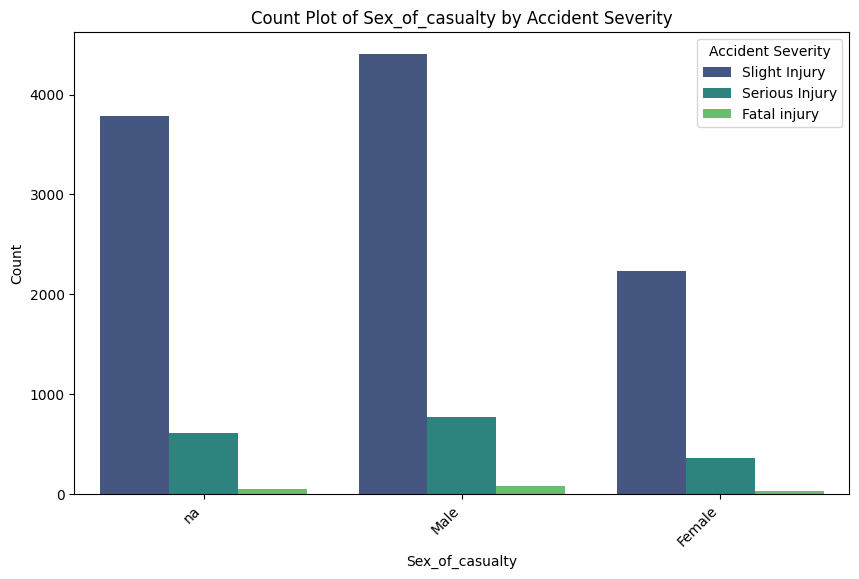

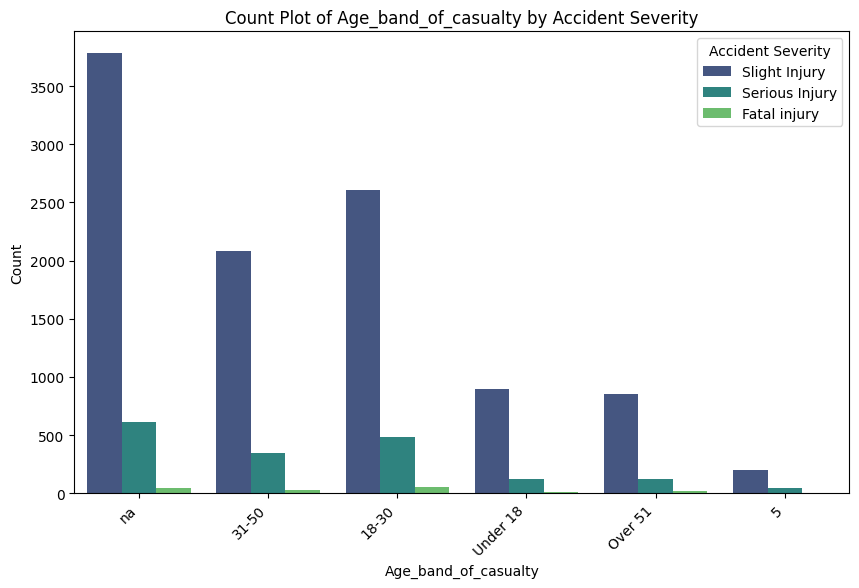

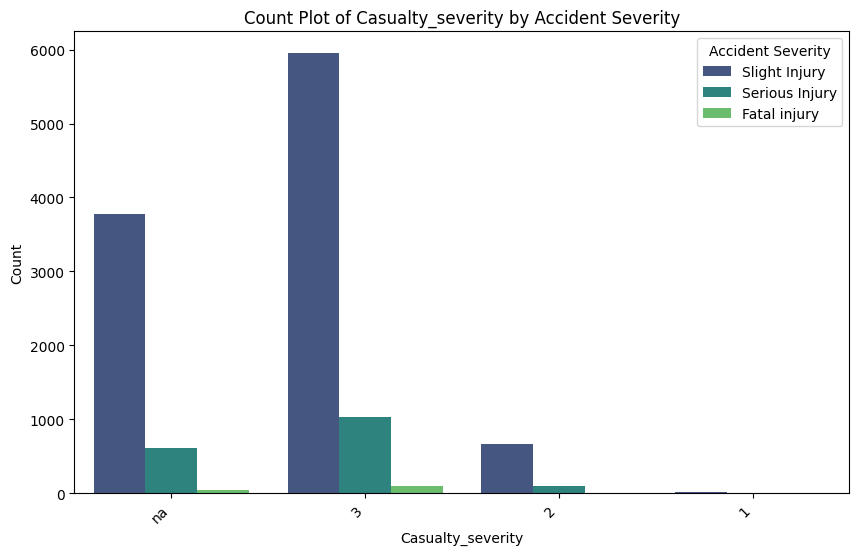

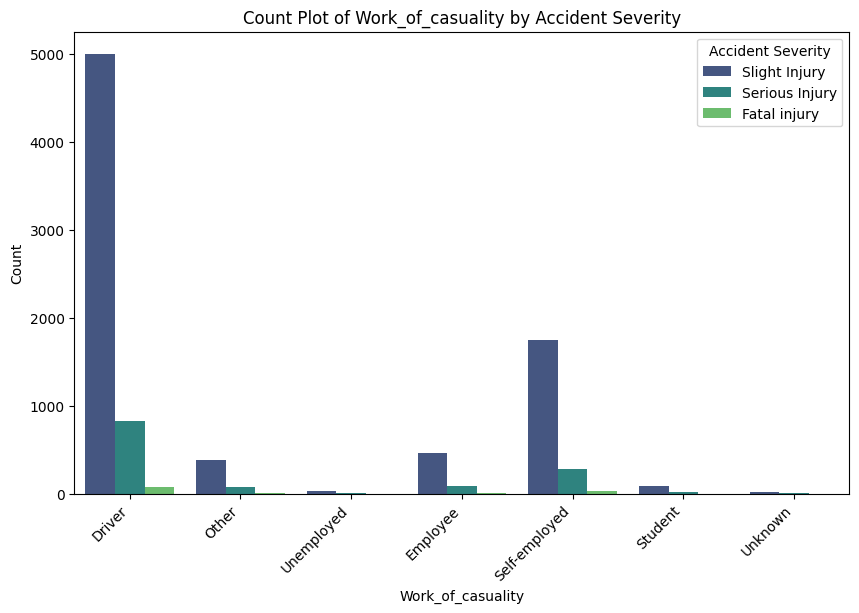

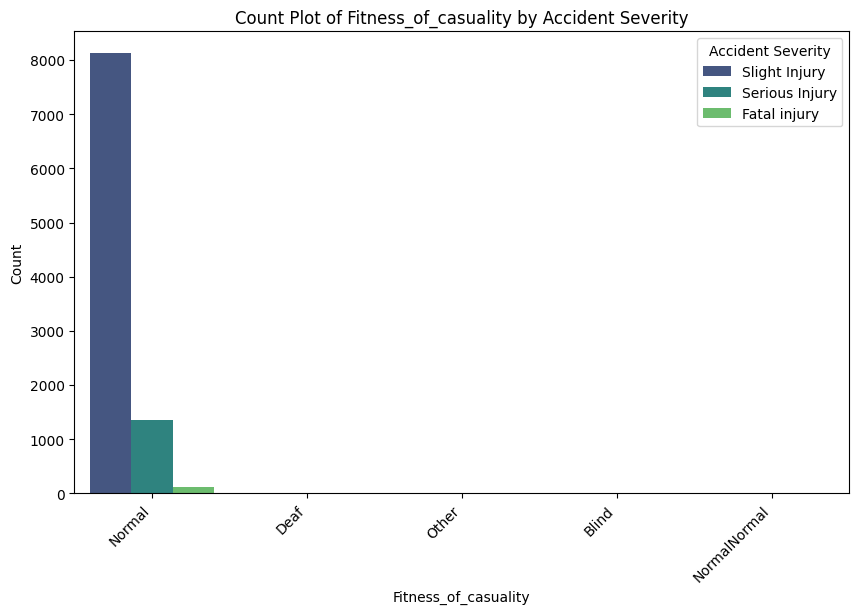

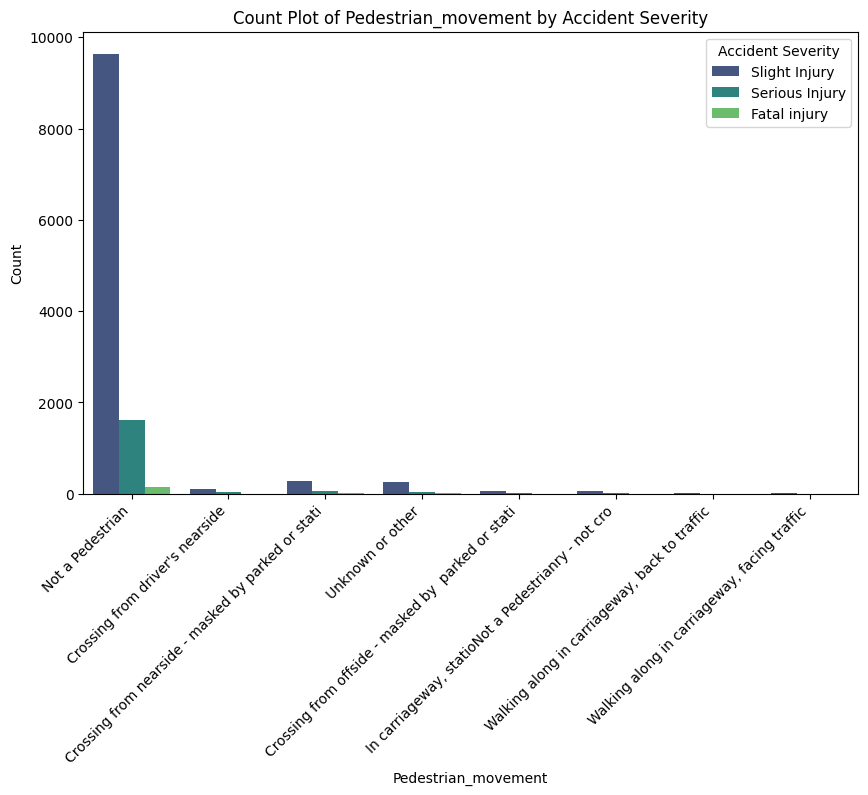

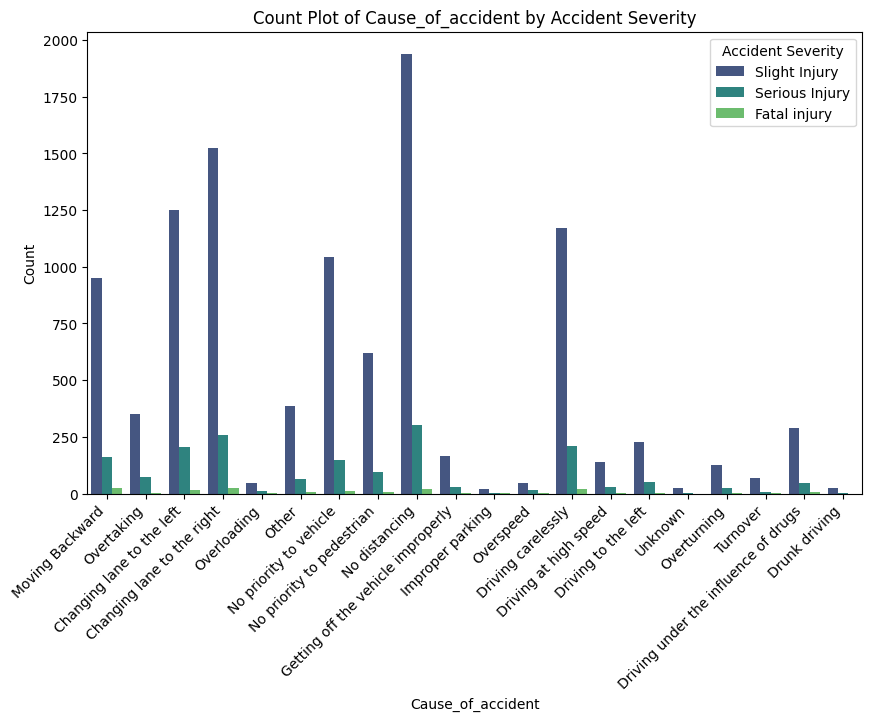

In [35]:
# Plotting count plot for target variable against each categorical column
for col in categorical_cols:
    plt.figure(figsize=(10, 6))

    # Limit the displayed categorical values to the first 50 characters
    df[col] = df[col].apply(lambda x: x[:50] if isinstance(x, str) and len(x) > 50 else x)

    sns.countplot(x=col, hue='Accident_severity', data=df, palette='viridis')
    plt.title(f'Count Plot of {col} by Accident Severity')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Accident Severity')
    plt.show()


In [36]:
# a review and analysis of above graphs does not give a strong enough
# reason to drop them at this moment.

In [37]:
# Now dabl library will be called and used to get further insights about columns

Target looks like classification
Linear Discriminant Analysis training set score: 0.333
Showing only top 10 of 31 categorical features


[<Axes: title={'center': 'Target distribution'}, xlabel='count', ylabel='Accident_severity'>,
 [array([[<Axes: ylabel='Time'>, <Axes: >],
         [<Axes: xlabel='Time', ylabel='Number_of_casualties'>,
          <Axes: xlabel='Number_of_casualties'>]], dtype=object),
  <Figure size 800x400 with 2 Axes>,
  <Figure size 400x400 with 1 Axes>],
 array([[<Axes: title={'center': 'Number_of_vehicles_involved'}>,
         <Axes: title={'center': 'Types_of_Junction'}>,
         <Axes: title={'center': 'Age_band_of_driver'}>,
         <Axes: title={'center': 'Weather_conditions'}>,
         <Axes: title={'center': 'Type_of_vehicle'}>],
        [<Axes: title={'center': 'Area_accident_occured'}>,
         <Axes: title={'center': 'Cause_of_accident'}>,
         <Axes: title={'center': 'Day_of_week'}>,
         <Axes: title={'center': 'Light_conditions'}>,
         <Axes: title={'center': 'Type_of_collision'}>]], dtype=object)]

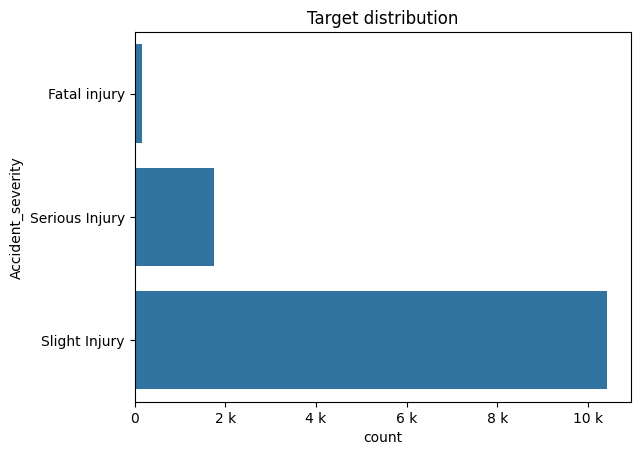

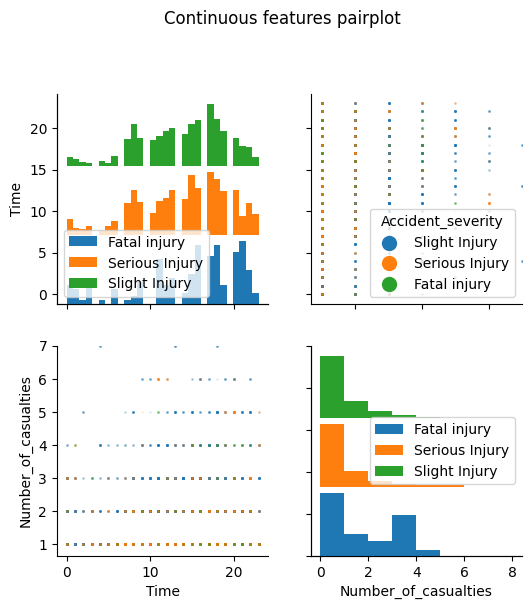

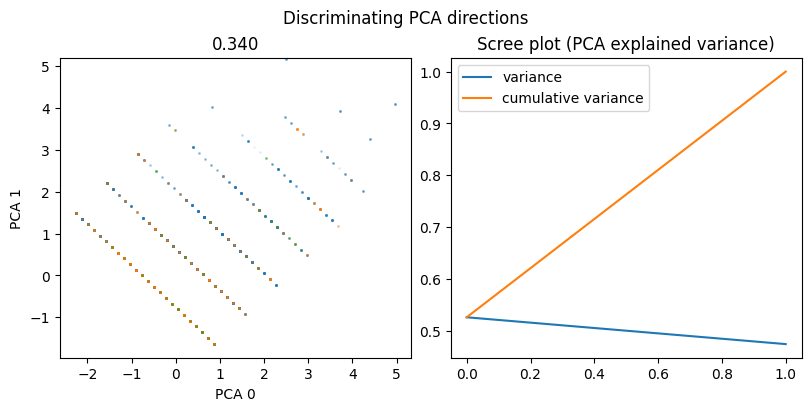

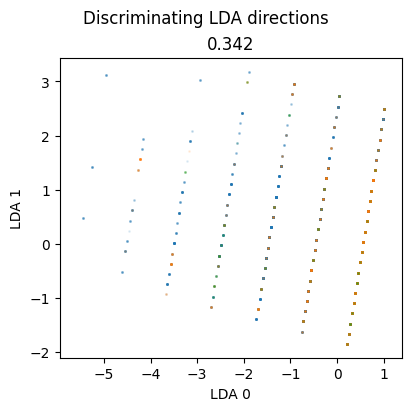

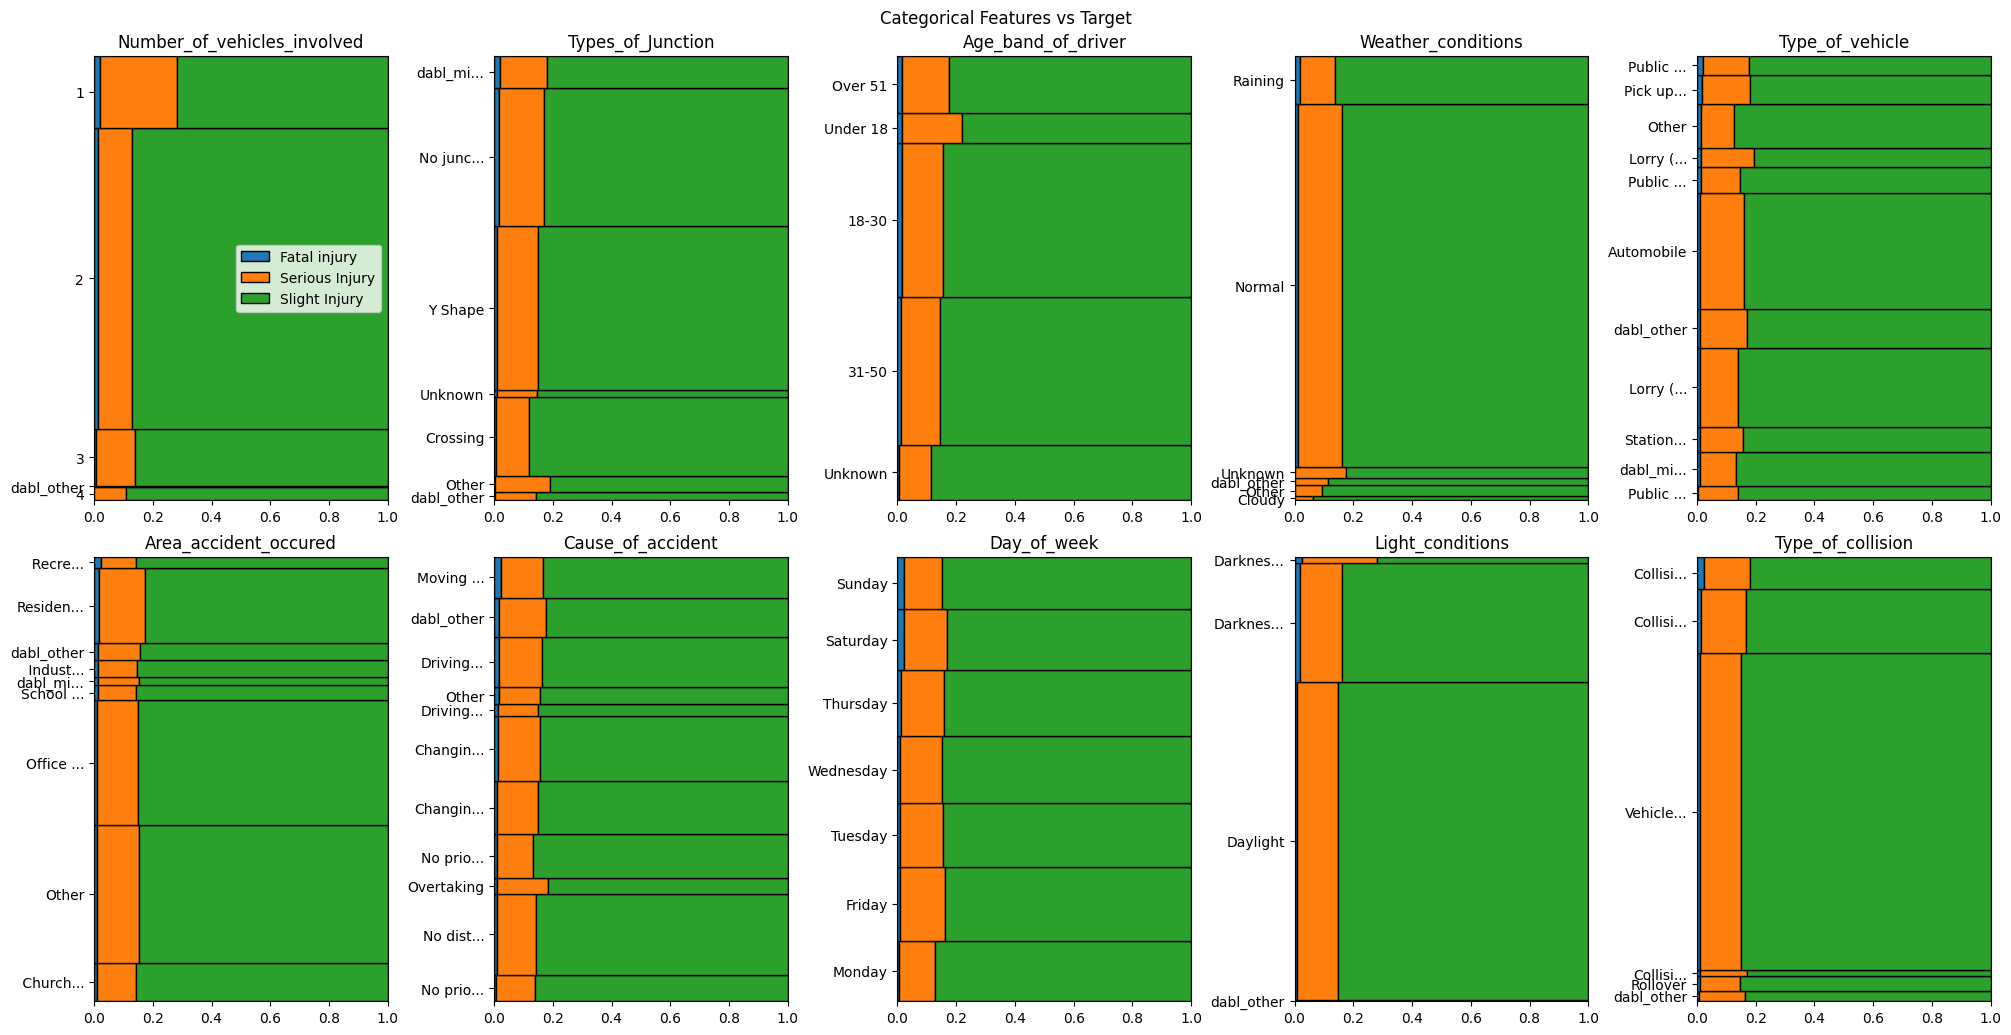

In [38]:
dabl.plot(df, target_col='Accident_severity')

In [39]:
# dabl analysis has identified top 10 features.
# we can see that if more number of vehicles are involved and more casualities involved
# in an accident, then the chances of fatal injury are more.
# similarly, higher accidents on weekends and also in darkness.
# In other features also we can see some corelation, even though visually not very clear.
# So at this point, we can say that all of the above 10 features should be used in our
# modeling. Same time we have done some other visualizations also and do have some domain
# knowledge as well, plus done some Excel based analysis of data as well.
# Based on all these factors, below 2 columns as they have very random values and
# their usage is also not clear


In [40]:
# Dropping 2 columns, as atated above
df.drop(['Defect_of_vehicle', 'Fitness_of_casuality'], axis=1, inplace=True)

In [41]:
# Remove specified values from categorical_cols
values_to_remove = ['Defect_of_vehicle', 'Fitness_of_casuality']
categorical_cols = [col for col in categorical_cols if col not in values_to_remove]

In [42]:
df_30 = df.copy(deep=True)

In [43]:
df.shape

(12316, 30)

In [44]:
# We will try using SelectKbest technique next.
# But before that, we need to handle null values.
# This data appears to have been captured meticulosly. So wherever we
# have null values, we can assume that investigation did not reveal any data, so
# we will change those to 'unknown'.
# 'na' values will not be changed assuming they are actual values of dataset
# after doing the above, we will do one hot encoding and then use SelecKbest technique

In [45]:
df.replace('Unknown', 'unknown', inplace=True) #convert Unknown to lowercase

In [46]:
# Display columns with null values
null_columns = df.columns[df.isnull().any()]
print("Columns with null values:")
print(df[null_columns].isnull().sum())

Columns with null values:
Educational_level           741
Vehicle_driver_relation     579
Driving_experience          829
Type_of_vehicle             950
Owner_of_vehicle            482
Service_year_of_vehicle    3928
Area_accident_occured       239
Lanes_or_Medians            385
Road_allignment             142
Types_of_Junction           887
Road_surface_type           172
Type_of_collision           155
Vehicle_movement            308
Work_of_casuality          3198
dtype: int64


In [47]:
# Replace null values with 'unknown'
df.fillna('unknown', inplace=True)

In [48]:
# Display columns with null values
null_columns = df.columns[df.isnull().any()]
print("Columns with null values:")
print(df[null_columns].isnull().sum())

Columns with null values:
Series([], dtype: float64)


In [49]:
df_30_no_nulls = df.copy(deep=True)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  int64 
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            12316 non-null  object
 5   Vehicle_driver_relation      12316 non-null  object
 6   Driving_experience           12316 non-null  object
 7   Type_of_vehicle              12316 non-null  object
 8   Owner_of_vehicle             12316 non-null  object
 9   Service_year_of_vehicle      12316 non-null  object
 10  Area_accident_occured        12316 non-null  object
 11  Lanes_or_Medians             12316 non-null  object
 12  Road_allignment              12316 non-null  object
 13  Types_of_Junction            12

In [51]:
# no null values are left in dataset

In [52]:
# Perform one-hot encoding including the target variable
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [53]:
df_encoded_backup = df_encoded.copy(deep=True) # keeping backup in case required

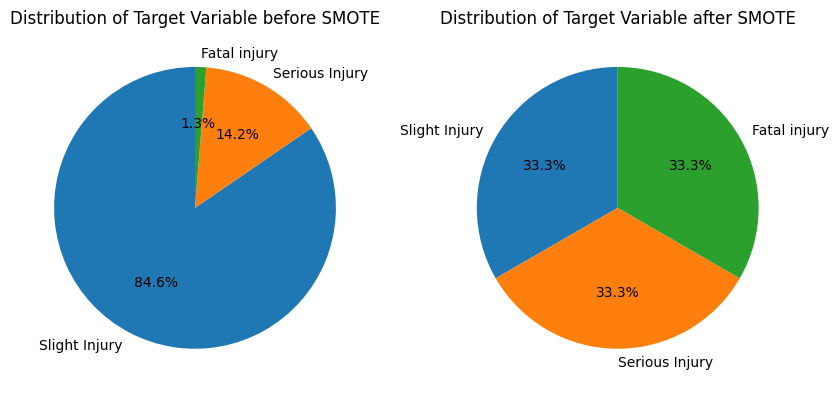

In [56]:
# Now df_encoded is one-hot encoded feature matrix, and 'Accident_severity' is the
# target variable. We will use SMOTE technique to balance the dataset
X = df_encoded.drop(columns=['Accident_severity'])
y = df_encoded['Accident_severity']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Set up the subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Pie chart before SMOTE
axes[0].pie(y.value_counts(), labels=y.value_counts().index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Distribution of Target Variable before SMOTE')

# Pie chart after SMOTE
axes[1].pie(y_resampled.value_counts(), labels=y_resampled.value_counts().index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Distribution of Target Variable after SMOTE')

# Display the plots
plt.show()


In [57]:
# as we can see above, dataset has been balanced across all three classes

In [58]:
# Apply SelectKBest with K=50. Value 50 was arrived at after few iterations
# testing
X_temp = X_resampled
y_temp = y_resampled

k_best = SelectKBest(f_classif, k=50)
X_selected = k_best.fit_transform(X_temp, y_temp)

# Get the names of the selected columns
selected_columns = X_temp.columns[k_best.get_support(indices=True)]

# Display the selected column names
print("Selected Columns:", selected_columns)


Selected Columns: Index(['Number_of_vehicles_involved', 'Number_of_casualties', 'Time_7',
       'Time_8', 'Time_10', 'Time_12', 'Time_14', 'Time_17',
       'Day_of_week_Monday', 'Day_of_week_Sunday', 'Day_of_week_Tuesday',
       'Day_of_week_Wednesday', 'Age_band_of_driver_31-50',
       'Age_band_of_driver_Over 51', 'Age_band_of_driver_unknown',
       'Educational_level_Elementary school', 'Educational_level_High school',
       'Vehicle_driver_relation_Owner', 'Driving_experience_5-10yr',
       'Driving_experience_Above 10yr', 'Driving_experience_Below 1yr',
       'Type_of_vehicle_Lorry (41?100Q)', 'Type_of_vehicle_Other',
       'Type_of_vehicle_Pick up upto 10Q', 'Type_of_vehicle_unknown',
       'Service_year_of_vehicle_5-10yrs', 'Service_year_of_vehicle_Above 10yr',
       'Area_accident_occured_ Church areas',
       'Area_accident_occured_Office areas', 'Area_accident_occured_Other',
       'Lanes_or_Medians_Two-way (divided with broken lines road marking)',
       'Lanes

In [59]:
# Above 50 most impactful columns with corresponding categorical
# values have been selected for modeling. It includes previously identified
# columns by DABL

In [60]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_resampled, test_size=0.2, random_state=42)


In [64]:
# Defining below a different pair of 2 models selected for training
models = {
    'GradientBoosting': GradientBoostingClassifier(),
    'SVM': SVC(),
}


In [65]:
# Initialize metrics dictionaries
train_metrics = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [], 'Confusion Matrix': []}
test_metrics = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [], 'Confusion Matrix': []}

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming you have defined X_train, X_test, y_train, and y_test before this point

# Train and evaluate models
train_metrics_list = []
test_metrics_list = []

for name, model in models.items():
    if name == 'LogisticRegression':
        # Scale the data for Logistic Regression
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    else:
        X_train_scaled, X_test_scaled = X_train, X_test

    # Fit the model
    model.fit(X_train_scaled, y_train)

    # Metrics calculation for training set
    train_preds = model.predict(X_train_scaled)
    train_metrics = {
        'Model': name,
        'Accuracy': accuracy_score(y_train, train_preds),
        'Precision': precision_score(y_train, train_preds, average='weighted'),
        'Recall': recall_score(y_train, train_preds, average='weighted'),
        'F1 Score': f1_score(y_train, train_preds, average='weighted'),
        'Confusion Matrix': confusion_matrix(y_train, train_preds)
    }

    # Metrics calculation for testing set
    test_preds = model.predict(X_test_scaled)
    test_metrics = {
        'Model': name,
        'Accuracy': accuracy_score(y_test, test_preds),
        'Precision': precision_score(y_test, test_preds, average='weighted'),
        'Recall': recall_score(y_test, test_preds, average='weighted'),
        'F1 Score': f1_score(y_test, test_preds, average='weighted'),
        'Confusion Matrix': confusion_matrix(y_test, test_preds)
    }

    # Append metrics to lists
    train_metrics_list.append(train_metrics)
    test_metrics_list.append(test_metrics)


In [70]:
import pandas as pd
from tabulate import tabulate

# Assuming you have train_metrics_list and test_metrics_list available

# Display metrics in tables
headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "Confusion Matrix"]

# Training Set Metrics
train_df = pd.DataFrame(train_metrics_list)
print("Training Set Metrics:")
print(tabulate(train_df, headers=headers, tablefmt="pretty", showindex=False))

# Testing Set Metrics
test_df = pd.DataFrame(test_metrics_list)
print("\nTesting Set Metrics:")
print(tabulate(test_df, headers=headers, tablefmt="pretty", showindex=False))


Training Set Metrics:
+------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|      Model       |      Accuracy      |     Precision      |       Recall       |      F1 Score      |  Confusion Matrix  |
+------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
| GradientBoosting | 0.7909265482477197 | 0.7903432833365481 | 0.7909265482477197 | 0.7905299990647584 | [[7088 1129  113]  |
|                  |                    |                    |                    |                    |  [1227 5830 1258]  |
|                  |                    |                    |                    |                    |  [ 285 1214 6852]] |
|       SVM        | 0.8630580892942871 | 0.8620794321346725 | 0.8630580892942871 | 0.8606074603629678 | [[8003  249   78]  |
|                  |                    |                    |                    |             

<ipython-input-71-25722bcbbcf3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=train_df, x='Model', y='Accuracy', ax=axes[0], palette='viridis')
<ipython-input-71-25722bcbbcf3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=test_df, x='Model', y='Accuracy', ax=axes[1], palette='viridis')


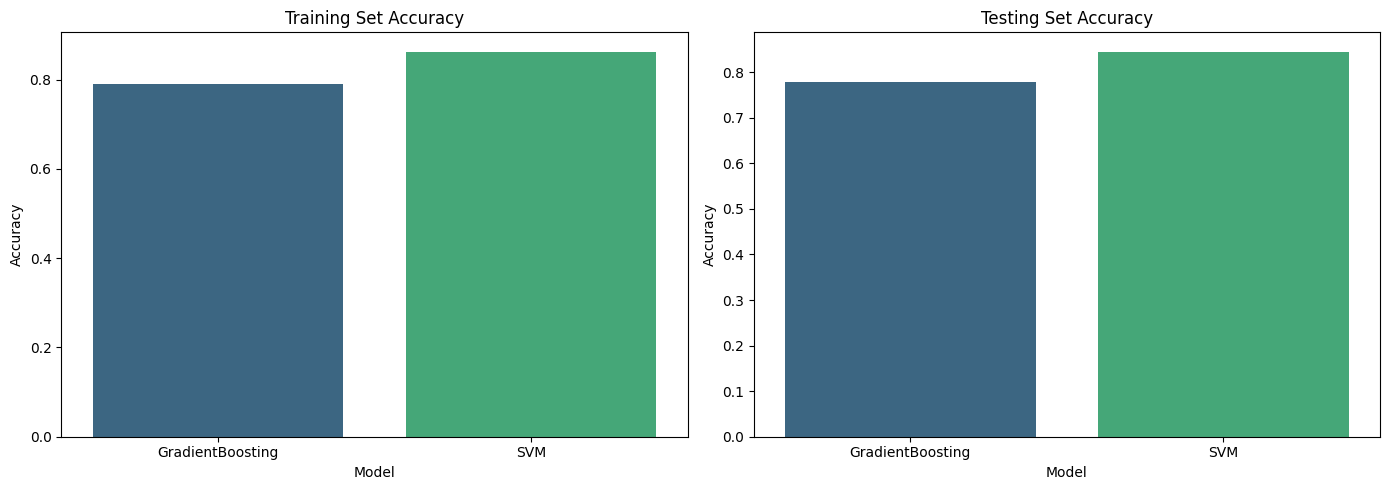

In [71]:

# Display metrics in bar charts
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart for training set metrics using seaborn
sns.barplot(data=train_df, x='Model', y='Accuracy', ax=axes[0], palette='viridis')
axes[0].set_title('Training Set Accuracy')

# Bar chart for testing set metrics using seaborn
sns.barplot(data=test_df, x='Model', y='Accuracy', ax=axes[1], palette='viridis')
axes[1].set_title('Testing Set Accuracy')

plt.tight_layout()
plt.show()


In [ ]:
# The best model based is SVM

**Explainable AI**

SHAP library will be used to explain the how the classification are reached and what features with their importance

In [ ]:
import shap
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

# Assuming X_train and y_train are your training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming svm_model and gb_model are your trained models
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# List of models
models = [svm_model, gb_model]

# Create a SHAP explainer object for each model
explainers = [shap.KernelExplainer(model.predict_proba, X_train) for model in models]

# Calculate SHAP values for a set of samples (e.g., the first 100 samples in the test set) for each model
shap_values_list = [explainer.shap_values(X_test.iloc[:100, :]) for explainer in explainers]

# Plot the summary plots for each model
for i, (model, shap_values) in enumerate(zip(models, shap_values_list)):
    plt.figure(figsize=(12, 6))
    shap.summary_plot(shap_values, X_test.iloc[:100, :], show=False)
    plt.title(f'SHAP Summary Plot - {type(model).__name__}')
    plt.show()


  0%|          | 0/100 [00:00<?, ?it/s]